In [1]:
# ================================================
# 1️⃣ Import Libraries
# ================================================
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:

# ================================================
# 2️⃣ Load and Preprocess CIFAR-10 Data
# ================================================
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1 (better for training)
x_train, x_test = x_train / 255.0, x_test / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:

# ================================================
# 3️⃣ Data Augmentation
# ================================================
# Create generator to apply real-time augmentation
datagen = ImageDataGenerator(
    rotation_range=15,         # random rotations
    width_shift_range=0.1,     # horizontal shift
    height_shift_range=0.1,    # vertical shift
    horizontal_flip=True,      # flip images horizontally
)

datagen.fit(x_train)


In [4]:

# ================================================
# 4️⃣ Build CNN Model with Padding + Pooling
# ================================================
model = models.Sequential([
    # Conv layer 1 (uses SAME padding)
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),  # reduces size from 32x32 -> 16x16

    # Conv layer 2 (uses SAME padding)
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),  # 16x16 -> 8x8

    # Conv layer 3 (uses SAME padding)
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),  # 8x8 -> 4x4

    # Flatten and connect to dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# ================================================
# 5️⃣ Compile Model
# ================================================
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [6]:
# ================================================
# 6️⃣ Train Model with Augmented Data
# ================================================
batch_size = 64
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),  # uses augmented images
    validation_data=(x_test, y_test),
    epochs=5
)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.3346 - loss: 1.7994 - val_accuracy: 0.5779 - val_loss: 1.1959
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5557 - loss: 1.2514 - val_accuracy: 0.6225 - val_loss: 1.0745
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6212 - loss: 1.0755 - val_accuracy: 0.6752 - val_loss: 0.9506
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6548 - loss: 0.9802 - val_accuracy: 0.6939 - val_loss: 0.8759
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6773 - loss: 0.9121 - val_accuracy: 0.7073 - val_loss: 0.8334


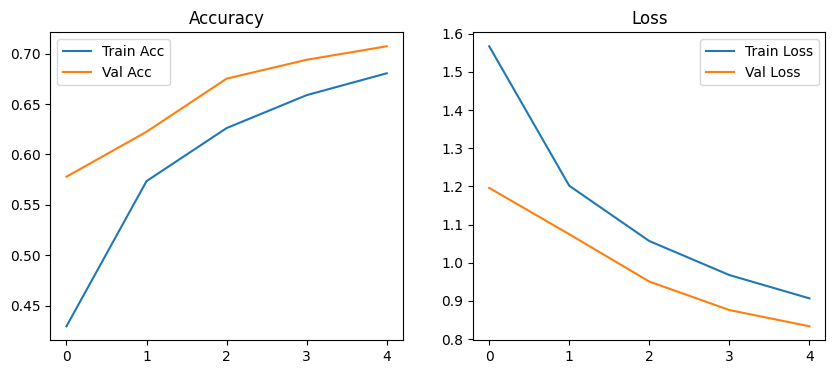

In [7]:

# ================================================
# 7️⃣ Plot Training Accuracy & Loss
# ================================================
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()
